# Capstone Project - The Battle of the Neighborhoods
### Applied Data Science Capstone by IBM

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

**Inkjet printers with ink tanks** have been gaining popularity in emerging countries like India. This is due to the appeal of lifetime ink that comes with the printer, tackling the perennial issue of frequent purchases of costly ink supplies.

Epson is the market leader currently with HP catching up hard to gain market share. With limited go to market funds and retail costs, **how can HP effectively compete in different countries by being selective in the in-country choice of cities to promote their printers with targeted product placement?**

For this project data science will be used to answer the above question. This will be a valuable tool for HP to gain market share rapidly without eroding profits unnecessarily to achieve it.

**India will be the chosen country** as it is one of the main battlegrounds of the ink tank printer war.

## Data <a name="data"></a>

**Google Trends** with the following parameters is used to generate the choice of cities for analysis in India by the amount of search interest:
* Search term **'tank printer'**
* Time range will be from Jan 2016 to Jan 2021
* Due to limitations of **pytrends API**, data will be imported for analysis using **Google Trends** generated csv file

**GeoPy API** is used to generate latitude and longitude data for India and selected cities.

**Foursquare API** is used to generate top 10 most common places where printers can be displayed and purchased within a 30km radius from city centre.

### Create dataframe from Google Trends csv file

Using the keywords "tank printer" the cities with search interest trend are listed and exported as a csv file.

**pytrends API** unfortunately is unable to generate data by cities for India so it is not used in the this analysis.

In [4]:
#Google trends on keyword "tank printer" for India by city for last 5 years
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e8b4efdc254b4e3cba32290b0c8527d1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='cNcMJRv8jZBy0FmKCDeWSa8D0zLGO_AKueTuJC1FNXyd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_e8b4efdc254b4e3cba32290b0c8527d1.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-8x8em0stoa3wot',Key='India_search_for_ tank_printer_Jan_2016_to_Jan_2021_from_Google_1Jan21.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_gtrend = pd.read_csv(body)
df_gtrend.head()

,City,trend_count
0,Kolkata,100
1,Ghaziabad,94
2,Noida,92
3,Mumbai,91
4,Gurgaon,84


### Generate latitude and longitude data for the listed cities using GeoPy

In [5]:
!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.extra.rate_limiter import RateLimiter

In [6]:
geolocator = Nominatim(user_agent="ny-application")
df_gtrend['gcode'] = df_gtrend['City'].apply(geolocator.geocode)
df_gtrend['lat'] = [g.latitude for g in df_gtrend['gcode']]
df_gtrend['long'] = [g.longitude for g in df_gtrend['gcode']]
df_gtrend

,City,trend_count,gcode,lat,long
0,Kolkata,100,"(Kolkata, Howrah, West Bengal, India, (22.5414...",22.541418,88.357691
1,Ghaziabad,94,"(Ghaziabad, Uttar Pradesh, India, (28.711241, ...",28.711241,77.444537
2,Noida,92,"(Noida, Dadri, Gautam Buddha Nagar, Uttar Prad...",28.535633,77.391073
3,Mumbai,91,"(Mumbai, Mumbai Suburban, Maharashtra, India, ...",19.075990,72.877393
4,Gurgaon,84,"(Gurgaon, Gurugram, Haryana, India, (28.428262...",28.428262,77.002700
5,New Delhi,62,"(New Delhi, Delhi, India, (28.6138954, 77.2090...",28.613895,77.209006
6,Coimbatore,57,"(Coimbatore, Coimbatore North, Coimbatore Dist...",11.001812,76.962842
7,Bengaluru,53,"(Bengaluru, Bangalore North, Bangalore Urban, ...",12.979120,77.591300
8,Kochi,47,"(Kochi, Ernakulam district, Kerala, 682005, In...",9.931370,76.267376
9,Chennai,46,"(Chennai, Chennai District, Tamil Nadu, India,...",13.083694,80.270186


### Use Folium to visualize the chosen India cities with the search trend ranking shown in pop up

Download all the dependencies that are required.

In [7]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 93 kB 2.1 MB/s  eta 0:00:01
Libraries imported.


Get the geographical coordinates of India.

In [8]:
address = 'India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of India are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of India are 22.3511148, 78.6677428.


Visualize India and the selected cities from Google Trends.

In [80]:
!pip install folium
import folium

# Create India map
map_india = folium.Map(location=[latitude, longitude], zoom_start=5)

# Add markers
for lat, lng, city, trend_count in zip(df_gtrend['lat'], df_gtrend['long'], df_gtrend['City'], df_gtrend['trend_count']):
    label = '{} {}'.format(city, trend_count)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_india)  
    
map_india

### Generate common places where printers can be displayed and purhcased in a 30km radius around the city centre using Foursquare

The following Foursquare categories are chosen to narrow down the data generated:
* Shopping Mall, 4bf58dd8d48988d1fd941735
* Shopping Plaza, 5744ccdfe4b0c0459246b4dc
* Outlet Mall, 5744ccdfe4b0c0459246b4df
* Outlet Store, 52f2ab2ebcbc57f1066b8b35
* Paper/Office Supplies Store, 4bf58dd8d48988d121951735
* Electronics Store, 4bf58dd8d48988d122951735
* Department Store, 4bf58dd8d48988d1f6941735
* Bookstore, 4bf58dd8d48988d114951735

Define Foursquare Credentials and Version.

In [11]:
CLIENT_ID = 'PXSRO5SKINAAQJNPRVFCCV1HRRTXJFRJ2LTMUSUXQ4NYXF03' # your Foursquare ID
CLIENT_SECRET = 'XBU45UFEDM1PLUXZQF0IPD5K0UPKLNG4AFIFQQBP034V04AFt' # your Foursquare Secret
ACCESS_TOKEN = '0SLF0JB3S5CMYQKWZO3GKBCDKNOOI2MZFJO1IVVWWVSAMOYE' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PXSRO5SKINAAQJNPRVFCCV1HRRTXJFRJ2LTMUSUXQ4NYXF03
CLIENT_SECRET:XBU45UFEDM1PLUXZQF0IPD5K0UPKLNG4AFIFQQBP034V04AFt


Explore the first city in dataframe as an example.

Get the city's name and geographical location.

In [12]:
city_latitude = df_gtrend.loc[0, 'lat'] # city latitude value
city_longitude = df_gtrend.loc[0, 'long'] # city longitude value

city_name = df_gtrend.loc[0, 'City'] # city name

print('Latitude and longitude values of {} are {}, {}.'.format(city_name, 
                                                               city_latitude, 
                                                               city_longitude))

Latitude and longitude values of Kolkata are 22.5414185, 88.35769124388872.


Now, let's get the top 100 venues within a radius of 30km.

First, let's create the GET request URL.

In [13]:
# Form Foursquare URL with categories where printers can likely be purchased
LIMIT = 100

radius = 30000

printer_categories = '4bf58dd8d48988d1fd941735,5744ccdfe4b0c0459246b4dc,5744ccdfe4b0c0459246b4df,52f2ab2ebcbc57f1066b8b35,4bf58dd8d48988d121951735,4bf58dd8d48988d122951735,4bf58dd8d48988d1f6941735,4bf58dd8d48988d114951735'

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&oauth_token={}&radius={}&limit={}'.format(
       CLIENT_ID,
       CLIENT_SECRET,
       VERSION,
       city_latitude,
       city_longitude,
       printer_categories,
       ACCESS_TOKEN,
       radius,
       LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=PXSRO5SKINAAQJNPRVFCCV1HRRTXJFRJ2LTMUSUXQ4NYXF03&client_secret=XBU45UFEDM1PLUXZQF0IPD5K0UPKLNG4AFIFQQBP034V04AFt&v=20180605&ll=22.5414185,88.35769124388872&categoryId=4bf58dd8d48988d1fd941735,5744ccdfe4b0c0459246b4dc,5744ccdfe4b0c0459246b4df,52f2ab2ebcbc57f1066b8b35,4bf58dd8d48988d121951735,4bf58dd8d48988d122951735,4bf58dd8d48988d1f6941735,4bf58dd8d48988d114951735&oauth_token=0SLF0JB3S5CMYQKWZO3GKBCDKNOOI2MZFJO1IVVWWVSAMOYE&radius=30000&limit=100'

Send the GET request and examine the results.

In [14]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ff08032dad389062d7cd86b'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kolkata',
  'headerFullLocation': 'Kolkata',
  'headerLocationGranularity': 'city',
  'query': 'mall',
  'totalResults': 43,
  'suggestedBounds': {'ne': {'lat': 22.81141877000027,
    'lng': 88.64947921959752},
   'sw': {'lat': 22.27141822999973, 'lng': 88.06590326817992}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5274b7f111d2b513631071a5',
       'name': 'Quest Mall',
       'location': {'address': '33, Syed Aamir Ali Ave',
        'lat': 22.539068009925764,
        'lng': 88.3655245668

All the information is in the items key. Use the get_category_type function from the Foursquare lab.

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe.

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Quest Mall,Shopping Mall,22.539068,88.365525
1,South City Mall,Shopping Mall,22.501758,88.361726
2,Acropolis Mall,Shopping Mall,22.514823,88.393235
3,City Centre,Shopping Mall,22.587921,88.408098
4,Mani Square Mall,Shopping Mall,22.577823,88.400591


How many venues were returned by Foursquare?

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

43 venues were returned by Foursquare.


## Methodology <a name="methodology"></a>

* Through **Foursquare API** generate for each city, venues where printers can be displayed and purchased within a 30km radius from city centre. 

* Group the venues by cities.

* Conduct hot encoding so each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

* Group the hot encoded rows by city and by taking the mean of the frequency of occurrence of each venue category, the higher the mean of a venue category means high number of venue around the city centre.

* Create a dataframe of 10 most commmon venues around each city centres.

* Cluster the cities by their 10 most common venues:
    * Find a suitable number for cluster using Elbow Method for distortion and inertia:
        * distortion: calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
        * inertia: sum of squared distances of samples to their closest cluster center.
    * Cluster the cities

* Visualize the city clusters.

* From the city clusters, determine suitable venues to market and display the printers.

## Analysis <a name="analysis"></a>

Let's create a function to repeat the same process to all the cities in India and generate venues where printers can be displayed and purchased within a 30km radius from city centre.

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=30000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&oauth_token={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            printer_categories,
            ACCESS_TOKEN,
            radius, 
            LIMIT)
                    
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each city and create a new dataframe called india_venues.

In [25]:
# type your answer here
india_venues = getNearbyVenues(names=df_gtrend['City'],
                                   latitudes=df_gtrend['lat'],
                                   longitudes=df_gtrend['long']
                                  )

Kolkata
Ghaziabad
Noida
Mumbai
Gurgaon
New Delhi
Coimbatore
Bengaluru
Kochi
Chennai
Guwahati
Hyderabad
Lucknow
Pune
Ahmedabad
Raipura
Indore


Check the size of the resulting dataframe

In [26]:
print(india_venues.shape)
india_venues.head()

(1078, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kolkata,22.541418,88.357691,Quest Mall,22.539068,88.365525,Shopping Mall
1,Kolkata,22.541418,88.357691,South City Mall,22.501758,88.361726,Shopping Mall
2,Kolkata,22.541418,88.357691,Acropolis Mall,22.514823,88.393235,Shopping Mall
3,Kolkata,22.541418,88.357691,City Centre,22.587921,88.408098,Shopping Mall
4,Kolkata,22.541418,88.357691,Mani Square Mall,22.577823,88.400591,Shopping Mall


Check how many venues were returned for each city.

In [27]:
india_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Ahmedabad,52,52,52,52,52,52
Bengaluru,100,100,100,100,100,100
Chennai,96,96,96,96,96,96
Coimbatore,26,26,26,26,26,26
Ghaziabad,75,75,75,75,75,75
Gurgaon,100,100,100,100,100,100
Guwahati,8,8,8,8,8,8
Hyderabad,100,100,100,100,100,100
Indore,20,20,20,20,20,20


Find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(india_venues['Venue Category'].unique())))

There are 50 uniques categories.


**Conduct one hot encoding on the above dataframe.**

In [29]:
# one hot encoding
india_onehot = pd.get_dummies(india_venues[['Venue Category']], prefix="", prefix_sep="")

# add City column back to dataframe
india_onehot['City'] = india_venues['City'] 

# move City column to the first column
fixed_columns = [india_onehot.columns[-1]] + list(india_onehot.columns[:-1])
india_onehot = india_onehot[fixed_columns]

india_onehot.head()

,City,Accessories Store,American Restaurant,Bakery,Big Box Store,Bookstore,Bowling Alley,Building,Bus Line,Business Center,Butcher,Café,Clothing Store,Coffee Shop,College Cafeteria,Convenience Store,Cosmetics Shop,Department Store,Electronics Store,Factory,Flea Market,Food & Drink Shop,Food Court,Furniture / Home Store,Grocery Store,Hotel,Market,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Music Store,Neighborhood,Nightlife Spot,Office,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Plaza,Residential Building (Apartment / Condo),Restaurant,Road,Sandwich Place,Shopping Mall,Shopping Plaza,Sporting Goods Shop,Stationery Store,Supermarket,Toy / Game Store,Women's Store
0,Kolkata,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Kolkata,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Kolkata,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Kolkata,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kolkata,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


And let's examine the new dataframe size.

In [30]:
india_onehot.shape

(1078, 51)

**Group rows by city and by taking the mean of the frequency of occurrence of each category.**

In [31]:
india_grouped = india_onehot.groupby('City').mean().reset_index()
india_grouped

,City,Accessories Store,American Restaurant,Bakery,Big Box Store,Bookstore,Bowling Alley,Building,Bus Line,Business Center,Butcher,Café,Clothing Store,Coffee Shop,College Cafeteria,Convenience Store,Cosmetics Shop,Department Store,Electronics Store,Factory,Flea Market,Food & Drink Shop,Food Court,Furniture / Home Store,Grocery Store,Hotel,Market,Men's Store,Miscellaneous Shop,Mobile Phone Shop,Multiplex,Music Store,Neighborhood,Nightlife Spot,Office,Other Nightlife,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Plaza,Residential Building (Apartment / Condo),Restaurant,Road,Sandwich Place,Shopping Mall,Shopping Plaza,Sporting Goods Shop,Stationery Store,Supermarket,Toy / Game Store,Women's Store
0,Ahmedabad,0.00,0.000000,0.000000,0.000000,0.076923,0.00,0.019231,0.000000,0.00,0.00,0.000000,0.019231,0.019231,0.000000,0.000000,0.019231,0.192308,0.192308,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.019231,0.019231,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.019231,0.000000,0.000000,0.000000,0.000000,0.000000,0.384615,0.000000,0.00,0.00,0.019231,0.000000,0.00
1,Bengaluru,0.01,0.000000,0.000000,0.000000,0.080000,0.00,0.000000,0.000000,0.00,0.01,0.020000,0.030000,0.000000,0.000000,0.000000,0.000000,0.270000,0.170000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.01,0.010000,0.010000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.340000,0.010000,0.01,0.00,0.000000,0.000000,0.00
2,Chennai,0.00,0.000000,0.000000,0.000000,0.052083,0.00,0.010417,0.000000,0.00,0.00,0.010417,0.031250,0.010417,0.010417,0.010417,0.000000,0.385417,0.104167,0.00,0.020833,0.00,0.010417,0.00,0.00,0.00,0.010417,0.010417,0.010417,0.00,0.020833,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010417,0.270833,0.010417,0.00,0.00,0.000000,0.000000,0.00
3,Coimbatore,0.00,0.000000,0.000000,0.000000,0.038462,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461538,0.115385,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307692,0.038462,0.00,0.00,0.000000,0.000000,0.00
4,Ghaziabad,0.00,0.000000,0.013333,0.013333,0.013333,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.026667,0.013333,0.000000,0.013333,0.000000,0.093333,0.053333,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.080000,0.000000,0.040000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.013333,0.026667,0.000000,0.000000,0.013333,0.013333,0.560000,0.013333,0.00,0.00,0.000000,0.000000,0.00
5,Gurgaon,0.00,0.010000,0.000000,0.000000,0.040000,0.00,0.000000,0.000000,0.01,0.00,0.020000,0.020000,0.010000,0.000000,0.000000,0.000000,0.160000,0.090000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.040000,0.000000,0.000000,0.00,0.000000,0.01,0.000000,0.010000,0.01,0.00,0.00,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000,0.010000,0.510000,0.010000,0.00,0.00,0.000000,0.010000,0.00
6,Guwahati,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.625000,0.000000,0.00,0.00,0.000000,0.000000,0.00
7,Hyderabad,0.00,0.000000,0.000000,0.000000,0.110000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.020000,0.020000,0.000000,0.010000,0.000000,0.320000,0.130000,0.00,0.000000,0.00,0.000000,0.01,0.00,0.00,0.000000,0.000000,0.010000,0.01,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.340000,0.000000,0.00,0.00,0.000000,0.000000,0.01
8,Indore,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1

Confirm the new size.

In [32]:
india_grouped.shape

(17, 51)

Print each city along with the top 5 most common venues.

In [33]:
num_top_venues = 5

for hood in india_grouped['City']:
    print("----"+hood+"----")
    temp = india_grouped[india_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ahmedabad----
               venue  freq
0      Shopping Mall  0.38
1  Electronics Store  0.19
2   Department Store  0.19
3          Bookstore  0.08
4     Clothing Store  0.02


----Bengaluru----
               venue  freq
0      Shopping Mall  0.34
1   Department Store  0.27
2  Electronics Store  0.17
3          Bookstore  0.08
4     Clothing Store  0.03


----Chennai----
               venue  freq
0   Department Store  0.39
1      Shopping Mall  0.27
2  Electronics Store  0.10
3          Bookstore  0.05
4     Clothing Store  0.03


----Coimbatore----
               venue  freq
0   Department Store  0.46
1      Shopping Mall  0.31
2  Electronics Store  0.12
3       Outlet Store  0.04
4          Bookstore  0.04


----Ghaziabad----
                venue  freq
0       Shopping Mall  0.56
1    Department Store  0.09
2              Market  0.08
3   Electronics Store  0.05
4  Miscellaneous Shop  0.04


----Gurgaon----
               venue  freq
0      Shopping Mall  0.51
1   Department 

Put that into a pandas dataframe.

Write a function to sort the venues in descending order.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

**Create the new dataframe and display the top 10 venues for each city.**

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = india_grouped['City']

for ind in np.arange(india_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(india_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahmedabad,Shopping Mall,Department Store,Electronics Store,Bookstore,Miscellaneous Shop,Building,Clothing Store,Cosmetics Shop,Paper / Office Supplies Store,Coffee Shop
1,Bengaluru,Shopping Mall,Department Store,Electronics Store,Bookstore,Clothing Store,Café,Hotel,Paper / Office Supplies Store,Butcher,Market
2,Chennai,Department Store,Shopping Mall,Electronics Store,Bookstore,Clothing Store,Flea Market,Multiplex,Café,Market,Men's Store
3,Coimbatore,Department Store,Shopping Mall,Electronics Store,Outlet Store,Shopping Plaza,Bookstore,Clothing Store,Food & Drink Shop,Flea Market,Factory
4,Ghaziabad,Shopping Mall,Department Store,Market,Electronics Store,Miscellaneous Shop,Plaza,Clothing Store,Convenience Store,Paper / Office Supplies Store,Coffee Shop


**Cluster Cities**

Run k-means and determine number of clusters.

In [36]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
india_grouped_clustering = india_grouped.drop('City', 1)
  
for k in K: 
    #Building and fitting the model 
        #kmeanModel = KMeans(n_clusters=k).fit(X) 
    #kmeanModel.fit(X)     
    kmeans = KMeans(n_clusters=k, random_state=0).fit(india_grouped_clustering)
    kmeans.fit(india_grouped_clustering)     
          
    #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    #                  'euclidean'),axis=1)) / X.shape[0]) 
    #inertias.append(kmeanModel.inertia_) 
    distortions.append(sum(np.min(cdist(india_grouped_clustering, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / india_grouped_clustering.shape[0]) 
    inertias.append(kmeans.inertia_) 
    
    #mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
    #            'euclidean'),axis=1)) / X.shape[0] 
    #mapping2[k] = kmeanModel.inertia_ 
    mapping1[k] = sum(np.min(cdist(india_grouped_clustering, kmeans.cluster_centers_, 
                'euclidean'),axis=1)) / india_grouped_clustering.shape[0] 
    mapping2[k] = kmeans.inertia_

Using the different values of Distortion.

In [37]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 0.21739675118135188
2 : 0.15606723363350222
3 : 0.10828759965413715
4 : 0.08735983101985867
5 : 0.07680471086411708
6 : 0.06712861820730795
7 : 0.058412734707160734
8 : 0.04789295931227106
9 : 0.04099052258855819


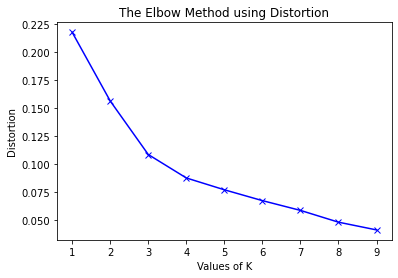

In [38]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

 Using the different values of Inertia.

In [39]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val)) 

1 : 1.424335914479128
2 : 0.5124370881449033
3 : 0.23544944727255282
4 : 0.15451946091009588
5 : 0.11635785329974219
6 : 0.09138708458987065
7 : 0.07301004877009279
8 : 0.05731626255596531
9 : 0.040529202925771286


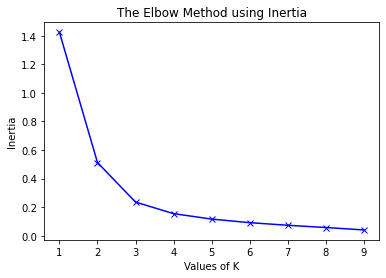

In [40]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

**From both Elbow Methods, it is determined the number of clusters should be 3.**

In [41]:
# From Elbow method using distortion and inertia above results set number of clusters
kclusters = 3

india_grouped_clustering = india_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(india_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 2, 2, 0, 2, 0], dtype=int32)

**Create a new dataframe that includes the cluster as well as the top 10 venues for each city.**

In [42]:
# add clustering labels
#cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
if 'Cluster Labels' not in cities_venues_sorted:
    cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
else:
    cities_venues_sorted['Cluster Labels'] = kmeans.labels_
    
india_merged = df_gtrend

# merge india_grouped with india_data to add latitude/longitude for each City
india_merged = india_merged.join(cities_venues_sorted.set_index('City'), on='City')

india_merged['Cluster Labels'] = india_merged['Cluster Labels'].fillna(0.0).astype(int) # Convert "Cluster Labels" to integer

#india_merged = india_merged.drop(['Postal Code'], axis=1)

#india_merged.dtypes

india_merged.head() # check the last columns!

,City,trend_count,gcode,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kolkata,100,"(Kolkata, Howrah, West Bengal, India, (22.5414...",22.541418,88.357691,2,Shopping Mall,Department Store,Electronics Store,Bookstore,Market,Residential Building (Apartment / Condo),Paper / Office Supplies Store,Women's Store,Coffee Shop,Food & Drink Shop
1,Ghaziabad,94,"(Ghaziabad, Uttar Pradesh, India, (28.711241, ...",28.711241,77.444537,2,Shopping Mall,Department Store,Market,Electronics Store,Miscellaneous Shop,Plaza,Clothing Store,Convenience Store,Paper / Office Supplies Store,Coffee Shop
2,Noida,92,"(Noida, Dadri, Gautam Buddha Nagar, Uttar Prad...",28.535633,77.391073,2,Shopping Mall,Electronics Store,Department Store,Market,Bookstore,Restaurant,Clothing Store,Paper / Office Supplies Store,Nightlife Spot,Toy / Game Store
3,Mumbai,91,"(Mumbai, Mumbai Suburban, Maharashtra, India, ...",19.075990,72.877393,2,Shopping Mall,Electronics Store,Department Store,Paper / Office Supplies Store,Bookstore,Clothing Store,Grocery Store,Sporting Goods Shop,Miscellaneous Shop,Coffee Shop
4,Gurgaon,84,"(Gurgaon, Gurugram, Haryana, India, (28.428262...",28.428262,77.002700,2,Shopping Mall,Department Store,Electronics Store,Market,Bookstore,Clothing Store,Café,Restaurant,Plaza,Music Store


Finally, let's visualize the resulting clusters.

In [58]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(india_merged['lat'], india_merged['long'], india_merged['City'], india_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(int(cluster)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examine clusters.**

Examine each cluster and determine the discriminating venue categories that distinguish the cluster, assign a name to the cluster.

#### Cluster 0

In [44]:
india_merged.loc[india_merged['Cluster Labels'] == 0, india_merged.columns[[0] + list(range(5, india_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Coimbatore,0,Department Store,Shopping Mall,Electronics Store,Outlet Store,Shopping Plaza,Bookstore,Clothing Store,Food & Drink Shop,Flea Market,Factory
7,Bengaluru,0,Shopping Mall,Department Store,Electronics Store,Bookstore,Clothing Store,Café,Hotel,Paper / Office Supplies Store,Butcher,Market
8,Kochi,0,Electronics Store,Shopping Mall,Department Store,Bookstore,Road,Bus Line,Paper / Office Supplies Store,Convenience Store,Café,Clothing Store
9,Chennai,0,Department Store,Shopping Mall,Electronics Store,Bookstore,Clothing Store,Flea Market,Multiplex,Café,Market,Men's Store
11,Hyderabad,0,Shopping Mall,Department Store,Electronics Store,Bookstore,Clothing Store,Coffee Shop,Furniture / Home Store,Miscellaneous Shop,Mobile Phone Shop,Neighborhood
12,Lucknow,0,Shopping Mall,Electronics Store,Department Store,Neighborhood,Women's Store,Coffee Shop,Food Court,Food & Drink Shop,Flea Market,Factory
13,Pune,0,Shopping Mall,Department Store,Electronics Store,Bookstore,Paper / Office Supplies Store,Clothing Store,Other Nightlife,Factory,Coffee Shop,Outlet Mall
14,Ahmedabad,0,Shopping Mall,Department Store,Electronics Store,Bookstore,Miscellaneous Shop,Building,Clothing Store,Cosmetics Shop,Paper / Office Supplies Store,Coffee Shop


#### Cluster 1

In [45]:
india_merged.loc[india_merged['Cluster Labels'] == 1, india_merged.columns[[0] + list(range(5, india_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Raipura,1,Electronics Store,Women's Store,Coffee Shop,Furniture / Home Store,Food Court,Food & Drink Shop,Flea Market,Factory,Department Store,Cosmetics Shop


#### Cluster 2

In [46]:
india_merged.loc[india_merged['Cluster Labels'] == 2, india_merged.columns[[0] + list(range(5, india_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kolkata,2,Shopping Mall,Department Store,Electronics Store,Bookstore,Market,Residential Building (Apartment / Condo),Paper / Office Supplies Store,Women's Store,Coffee Shop,Food & Drink Shop
1,Ghaziabad,2,Shopping Mall,Department Store,Market,Electronics Store,Miscellaneous Shop,Plaza,Clothing Store,Convenience Store,Paper / Office Supplies Store,Coffee Shop
2,Noida,2,Shopping Mall,Electronics Store,Department Store,Market,Bookstore,Restaurant,Clothing Store,Paper / Office Supplies Store,Nightlife Spot,Toy / Game Store
3,Mumbai,2,Shopping Mall,Electronics Store,Department Store,Paper / Office Supplies Store,Bookstore,Clothing Store,Grocery Store,Sporting Goods Shop,Miscellaneous Shop,Coffee Shop
4,Gurgaon,2,Shopping Mall,Department Store,Electronics Store,Market,Bookstore,Clothing Store,Café,Restaurant,Plaza,Music Store
5,New Delhi,2,Shopping Mall,Department Store,Electronics Store,Bookstore,Market,Clothing Store,Restaurant,Business Center,Paper / Office Supplies Store,Nightlife Spot
10,Guwahati,2,Shopping Mall,Clothing Store,Electronics Store,Department Store,Women's Store,Food Court,Food & Drink Shop,Flea Market,Factory,Cosmetics Shop
16,Indore,2,Shopping Mall,Electronics Store,Department Store,Grocery Store,Food Court,Restaurant,Office,Coffee Shop,Food & Drink Shop,Flea Market


#### Cluster 3

In [47]:
india_merged.loc[india_merged['Cluster Labels'] == 3, india_merged.columns[[0] + list(range(5, india_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


#### Cluster 4

In [48]:
india_merged.loc[india_merged['Cluster Labels'] == 4, india_merged.columns[[0] + list(range(5, india_merged.shape[1]))]]

,City,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## Results and Discussion <a name="results"></a>

K-means clustering despite being unsupervised machine learning algorithms works well in this case study. Grouping similar data points together and discovering underlying patterns. Elbow Method provides an effective way to optimize the number of clusters.

Cluster 1 has only the city of Raipura (should be Raipur). The first most common venue is electronics store and it seems to be the only venue suitable for printer placement. For this city, HP will need to have a local channel partner that has large connections and frequent dealings with local electronics stores. This will ease printer demonstration and training of store owners.

Cluster 2 has a very consistent first common venue which is shopping mall. For these cities, HP might want to setup a storefront in the malls as it will command presence.HP will need trained regular employees to man the stores with knowledge of printer specifications, performance and operations.

Cluster 0 has a mixed first, second and third common venues, which consists of shopping malls, department stores and electronic stores. Due to the mix, there is opportunity to explore HP booths with promoters trained with knowledge of printer specifications, performance and operations. The booths can be targeted for department stores as there is regular traffic of shoppers and might capture browsers. The promoters should also distribute brochures to spread the word.

## Conclusion <a name="conclusion"></a>

From the above results the below table shows the recommended printer placement and retail channels for the cities that have shown high Google queries on printers with ink tanks.

| Cluster   | Cities                                                                  | Recommended Retail                          |
|-----------|-------------------------------------------------------------------------|---------------------------------------------|
| Cluster 0 |Coimbatre, Bengaluru, Kochi, Chennai, Hyderabad, Lucknow, Pune, Ahmedabad|HP booths                                    |
| Cluster 1 |Raipura (Raipur)                                                         |Electronics stores through HP channel partner|
| Cluster 2 |Kolkata, Ghaziabad, Noida, Mumbai, Gurgaon, New Delhi, Guwahati, Indore  |HP stores at malls                           |